<a href="https://colab.research.google.com/github/nikhil1728/Nikhil-DA-/blob/main/Project_using_hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089.txt')
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
data['datetime'].min(), data['datetime'].max()

('2011-01-01 00:00:00', '2012-12-19 23:00:00')

In [ ]:
data.shape

(10886, 12)

In [ ]:
data.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
data.describe()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
columns = ['temp', 'atemp', 'humidity', 'windspeed']
for i in columns:
  a = np.median(data[i])
  print(i+' meidan:', a)

temp meidan: 20.5
atemp meidan: 24.24
humidity meidan: 62.0
windspeed meidan: 12.998


In [ ]:
data.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [ ]:
count_of_Rentals_in_workingdays = data.groupby('workingday')['count'].sum()
count_of_Rentals_in_workingdays

,count
workingday,
0,654872
1,1430604


<Axes: xlabel='workingday'>

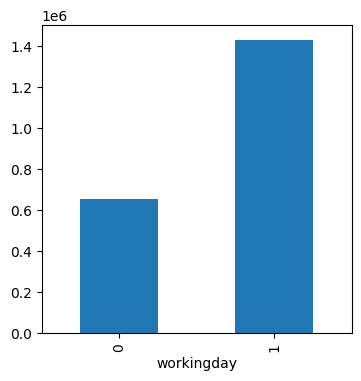

In [ ]:
count_of_Rentals_in_workingdays.plot(kind = 'bar', figsize = (4,4))

In [ ]:
count_of_Rentals_in_holidays = data.groupby('holiday')['count'].sum()
count_of_Rentals_in_holidays

,count
holiday,
0,2027668
1,57808


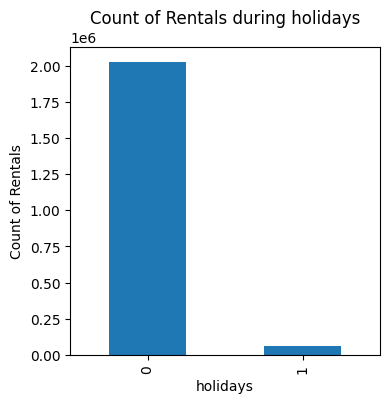

In [ ]:
count_of_Rentals_in_holidays.plot(kind = 'bar', figsize = (4,4))
plt.xlabel('holidays')
plt.ylabel('Count of Rentals')
plt.title('Count of Rentals during holidays')
plt.show()

No holiday, more bookings and less booking during holidays

1: spring, 2: summer, 3: fall, 4: winter

In [ ]:
season_rentals = data.groupby('season')['count'].sum()
season_rentals

,count
season,
1,312498
2,588282
3,640662
4,544034


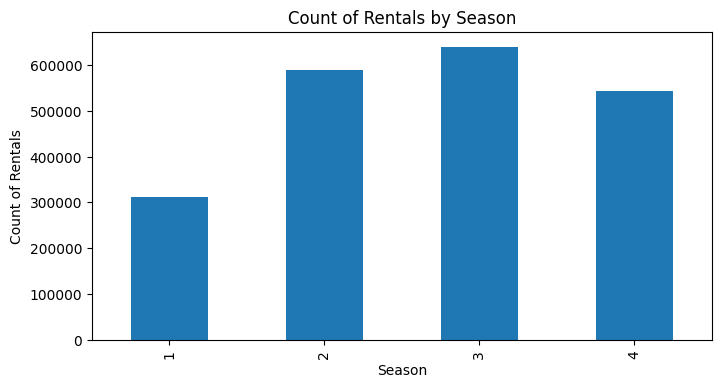

In [ ]:
season_rentals.plot(kind = 'bar', figsize = (8,4))
plt.xlabel('Season')
plt.ylabel('Count of Rentals')
plt.title('Count of Rentals by Season')
plt.show()

Season doesn't effect any bookings

1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [ ]:
weather_Rentals = data.groupby('weather')['count'].sum()
weather_Rentals

,count
weather,
1,1476063
2,507160
3,102089
4,164


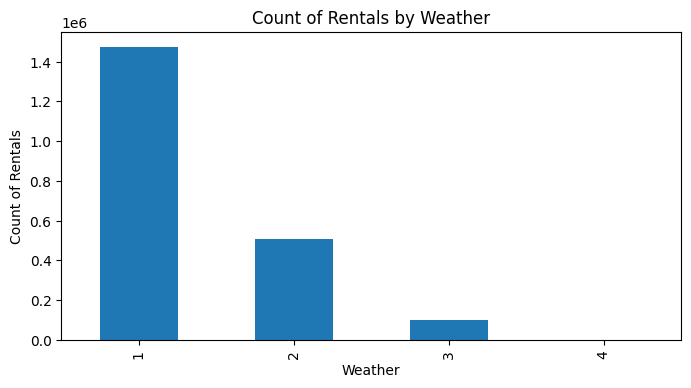

In [ ]:

weather_Rentals.plot(kind = 'bar', figsize = (8,4))
plt.xlabel('Weather')
plt.ylabel('Count of Rentals')
plt.title('Count of Rentals by Weather')
plt.show()



1.   clear weather has more bookings

2.   Mist has little less and snow has very little and heavy rainfall has no bookings at all



**Bivariate Analysis**

In [ ]:
season_weather_crosstab = pd.crosstab(index = data['season'],columns = data['weather'],values = data['count'], aggfunc = 'sum',margins = True, margins_name = 'Total')
season_weather_crosstab

weather,1,2,3,4,Total
season,,,,,
1,223009.0,76406.0,12919.0,164.0,312498
2,426350.0,134177.0,27755.0,NaN,588282
3,470116.0,139386.0,31160.0,NaN,640662
4,356588.0,157191.0,30255.0,NaN,544034
Total,1476063.0,507160.0,102089.0,164.0,2085476


In [ ]:
season_weather_crosstabs = pd.crosstab(index = data['season'],columns = data['weather'],values = data['count'], aggfunc = 'sum')


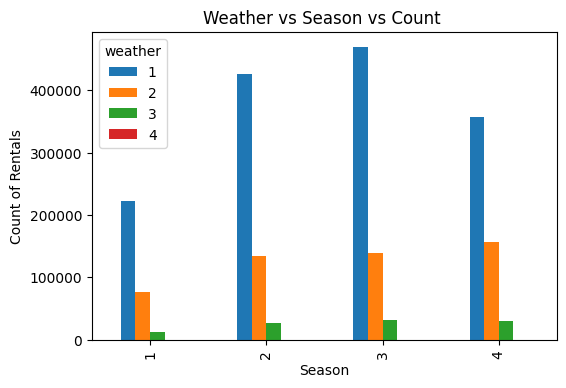

In [ ]:
season_weather_crosstabs.plot(kind = 'bar',figsize= (6,4))
plt.xlabel('Season')
plt.ylabel('Count of Rentals')
plt.title('Weather vs Season vs Count ')
plt.show()

In [ ]:
min_temp = data['temp'].min()
max_temp = data['temp'].max()
print("Minimum_temp_is:", min_temp)
print("Maximum_temp_is:", max_temp)
data['temp'].mean()

Minimum_temp_is: 0.82
Maximum_temp_is: 41.0


np.float64(20.23085981995223)

In [ ]:
min_windspeed = data['windspeed'].min()
max_windspeed = data['windspeed'].max()
print(min_windspeed)
print(max_windspeed)
data['windspeed'].mean()

0.0
56.9969


np.float64(12.7993954069447)

<Axes: ylabel='windspeed'>

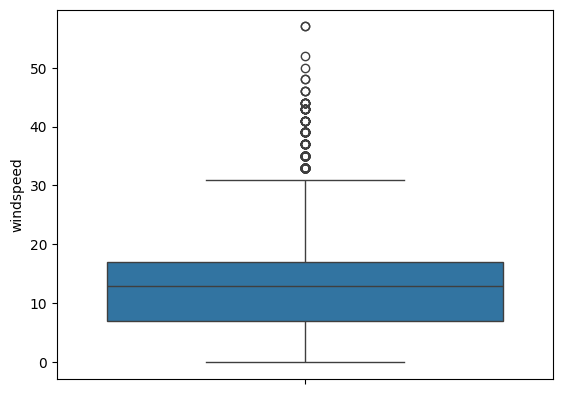

In [ ]:
sns.boxplot(data['windspeed'])

<Axes: ylabel='temp'>

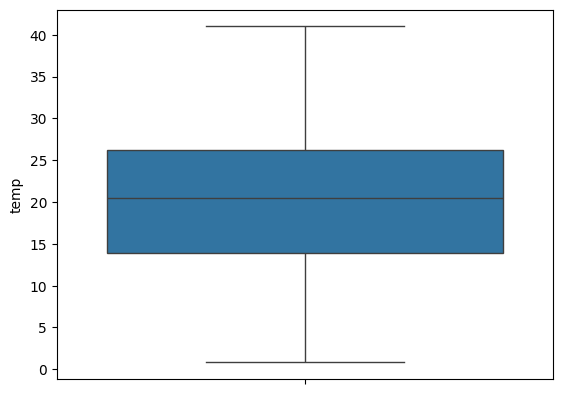

In [ ]:
sns.boxplot(data['temp'])

<Axes: ylabel='atemp'>

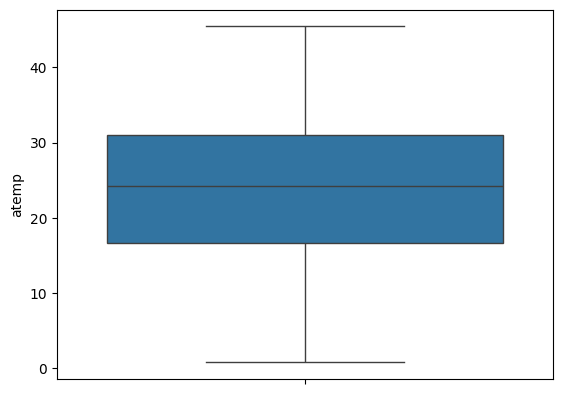

In [ ]:
sns.boxplot(data['atemp'])

<Axes: ylabel='humidity'>

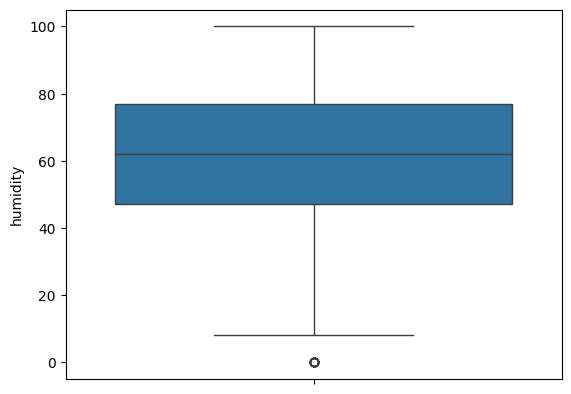

In [ ]:
sns.boxplot(data['humidity'])

<Axes: xlabel='workingday', ylabel='count'>

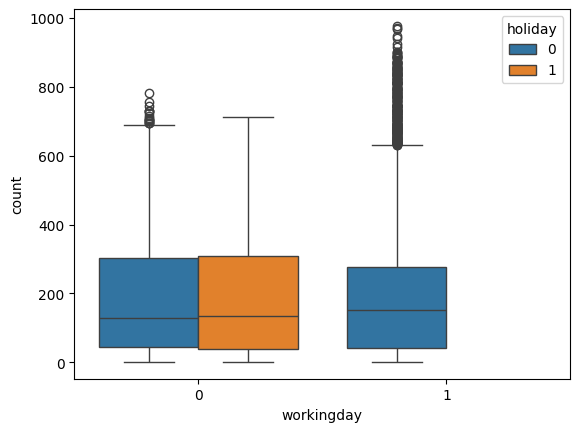

In [ ]:
sns.boxplot(data, x = 'workingday', y = 'count', hue = 'holiday')

In [ ]:
# bins based on windspeed
bins = [0,10,20,30,40,57]
groups = ['low_speed','med_speed','high_speed','higher_speed','very_higher_speeds']
data['wind_bins'] = pd.cut(data['windspeed'],bins, right = False,labels = groups)

# bins based on temperature
bins = [0, 10, 20, 30, 35, 42]
group = ['very_low_temp', 'low_temp', 'norm_temp','high_temp','veryhigh_temp']
data['temp_bins'] = pd.cut(data['temp'], bins,  right = False,labels=group)

# bins based on humidity
bins = [0,30,60,80,100]
groups = ['lower_humid', 'good_humid','high_humid','veryhigh_humid']
data['humidity_bins'] = pd.cut(data['humidity'],bins, labels = groups, right = False)

data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,wind_bins,temp_bins,humidity_bins
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,low_speed,very_low_temp,veryhigh_humid
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,low_speed,very_low_temp,veryhigh_humid
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,low_speed,very_low_temp,veryhigh_humid
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,low_speed,very_low_temp,high_humid
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,low_speed,very_low_temp,high_humid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,high_speed,low_temp,good_humid
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,med_speed,low_temp,good_humid
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,med_speed,low_temp,high_humid
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,low_speed,low_temp,high_humid


In [ ]:
data.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [ ]:
grouped_data_by_temp= data.groupby('temp_bins')['count'].sum()

grouped_data_by_temp

/tmp/ipython-input-1171222308.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_by_temp= data.groupby('temp_bins')['count'].sum()


,count
temp_bins,
very_low_temp,92141
low_temp,609233
norm_temp,968265
high_temp,351600
veryhigh_temp,64237


In [ ]:
wind_bins_count = data.groupby('wind_bins')['count'].sum()
wind_bins_count

/tmp/ipython-input-32654921.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_bins_count = data.groupby('wind_bins')['count'].sum()


,count
wind_bins,
low_speed,712814
med_speed,1062399
high_speed,223899
higher_speed,79889
very_higher_speeds,6475


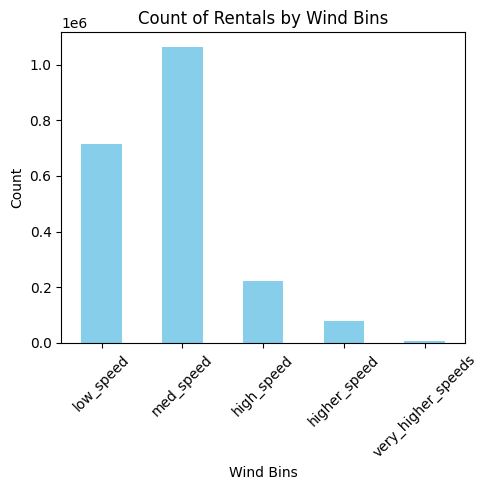

In [ ]:
plt.figure(figsize=(5, 5))
wind_bins_count.plot(kind='bar', color='skyblue')
plt.xlabel('Wind Bins')
plt.ylabel('Count')
plt.title('Count of Rentals by Wind Bins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
temp_bins_count = data.groupby('temp_bins')['count'].sum()
temp_bins_count

/tmp/ipython-input-1592717096.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_bins_count = data.groupby('temp_bins')['count'].sum()


,count
temp_bins,
very_low_temp,92141
low_temp,609233
norm_temp,968265
high_temp,351600
veryhigh_temp,64237


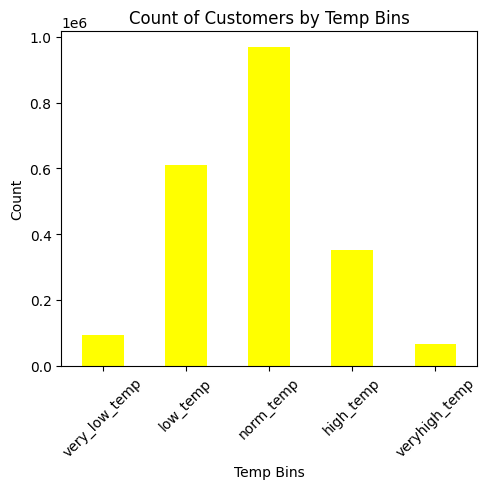

In [ ]:
plt.figure(figsize=(5, 5))
temp_bins_count.plot(kind='bar', color='yellow')
plt.xlabel('Temp Bins')
plt.ylabel('Count')
plt.title('Count of Customers by Temp Bins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
humidity_count = data.groupby('humidity_bins')['count'].sum()
humidity_count


/tmp/ipython-input-2671180018.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  humidity_count = data.groupby('humidity_bins')['count'].sum()


,count
humidity_bins,
lower_humid,120224
good_humid,1103607
high_humid,605136
veryhigh_humid,246668


<Axes: xlabel='humidity_bins'>

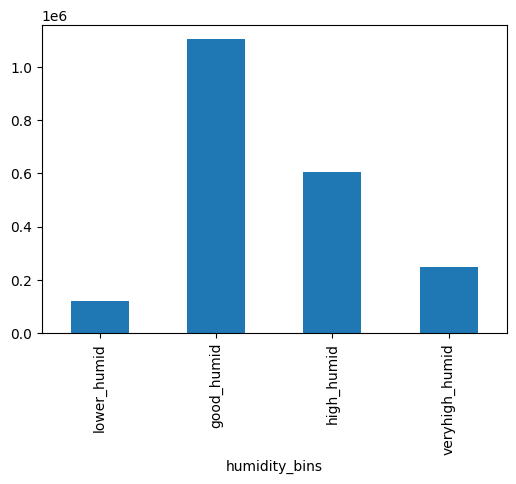

In [ ]:
humidity_count.plot(kind = 'bar', figsize = (6,4))

In [ ]:
wind_temp_crosstab = pd.crosstab(index = data['temp_bins'],columns = data['wind_bins'], aggfunc = 'sum', values = data['count'])
wind_temp_crosstab

wind_bins,low_speed,med_speed,high_speed,higher_speed,very_higher_speeds
temp_bins,,,,,
very_low_temp,38606,38612,9635,4783,505
low_temp,208538,292143,82119,23997,2436
norm_temp,342443,484899,100308,38180,2435
high_temp,110613,204174,25158,10556,1099
veryhigh_temp,12614,42571,6679,2373,0


Text(0, 0.5, 'Count of Rentals')

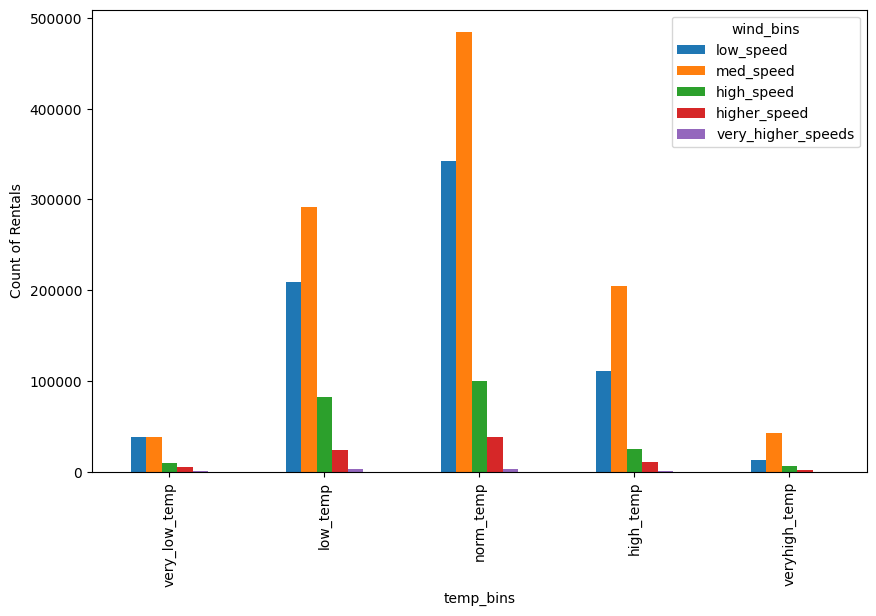

In [ ]:
wind_temp_crosstab.plot(kind = 'bar', figsize = (10,6))
plt.ylabel('Count of Rentals')

In [ ]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,wind_bins,temp_bins,humidity_bins
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,low_speed,very_low_temp,veryhigh_humid
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,low_speed,very_low_temp,veryhigh_humid
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,low_speed,very_low_temp,veryhigh_humid
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,low_speed,very_low_temp,high_humid
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,low_speed,very_low_temp,high_humid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,high_speed,low_temp,good_humid
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,med_speed,low_temp,good_humid
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,med_speed,low_temp,high_humid
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,low_speed,low_temp,high_humid


In [ ]:
workingdays_count = data.groupby('workingday')['count'].sum()
workingdays_count

,count
workingday,
0,654872
1,1430604


<Axes: xlabel='workingday'>

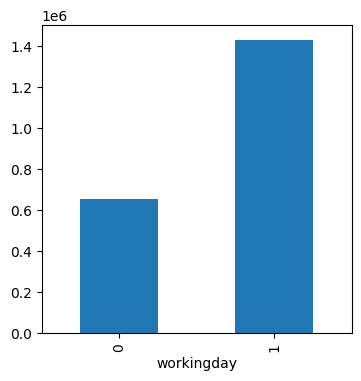

In [ ]:
workingdays_count.plot(kind = 'bar', figsize = (4,4))

In [ ]:
from scipy.stats import ttest_ind
# H0 :  No significant difference in booking counts between working days and non-working days
# Ha : There is a significant difference in booking counts between working days and non-working day
workingday_counts = data[data['workingday'] == 1]['count']
non_workingday_counts = data[data['workingday'] == 0]['count']
t_statistic, p_value = ttest_ind(workingday_counts, non_workingday_counts, alternative = 'two-sided')
print("T-statistic:", t_statistic)
print("P-value:", p_value)
alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: No significant difference in booking counts between working days and non-working days.")
else:
    print("Reject the null hypothesis: There is a significant difference in booking counts between working days and non-working days.")


T-statistic: 1.2096277376026694
P-value: 0.22644804226361348
Fail to reject the null hypothesis: No significant difference in booking counts between working days and non-working days.


In [ ]:
holidays_count = data.groupby('holiday')['count'].sum()
holidays_count

,count
holiday,
0,2027668
1,57808


<Axes: xlabel='holiday'>

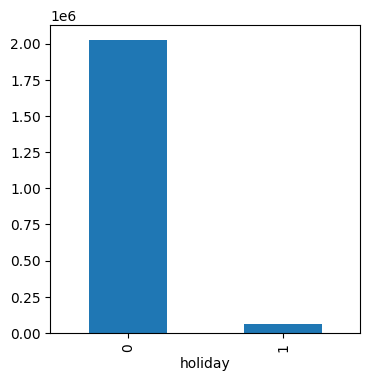

In [ ]:
holidays_count.plot(kind = 'bar', figsize = (4,4))

In [ ]:
# H0 :  No significant difference in booking counts between  holidays and non-holidays
# Ha : There is a significant difference in booking counts between holidays and non-holiday
holiday_counts = data[data['holiday'] == 1]['count']
non_holiday_counts = data[data['holiday'] == 0]['count']
t_statistic, p_value = ttest_ind(holiday_counts, non_holiday_counts, alternative = 'two-sided')
print("T-statistic:", t_statistic)
print("P-value:", p_value)
alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: No significant difference in booking counts between  holidays and non-holidays.")
else:
    print("Reject the null hypothesis: There is a significant difference in booking counts between holidays and non-holidays.")


T-statistic: -0.5626388963477119
P-value: 0.5736923883271103
Fail to reject the null hypothesis: No significant difference in booking counts between  holidays and non-holidays.


In [ ]:
from scipy.stats import shapiro
shapiro(holiday_counts)

ShapiroResult(statistic=np.float64(0.8933219721845991), pvalue=np.float64(5.860375945260022e-14))

**Anova Test on weather and season column**

---



In [ ]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,wind_bins,temp_bins,humidity_bins
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,low_speed,very_low_temp,veryhigh_humid
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,low_speed,very_low_temp,veryhigh_humid
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,low_speed,very_low_temp,veryhigh_humid
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,low_speed,very_low_temp,high_humid
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,low_speed,very_low_temp,high_humid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,high_speed,low_temp,good_humid
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,med_speed,low_temp,good_humid
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,med_speed,low_temp,high_humid
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,low_speed,low_temp,high_humid


In [ ]:
from scipy.stats import levene, shapiro, kruskal

*Shapiro test on weather column, to check whether weather column is following Guassian or not*

---



In [ ]:
# H0 :weather_column is a Gaussian
# Ha :weather_column is not a Gaussian
from scipy.stats import shapiro
statistic_value, p_value = shapiro(data['weather'].sample(50))
print('p_value:',p_value)
if p_value <0.05:
  print('Reject Null Hypothesis: Weather_Column is not a Guassian')
else:
  print('Fail to reject null hypothesis: Weather_column is not a Guassian')

p_value: 8.327228516424918e-13
Reject Null Hypothesis: Weather_Column is not a Guassian


In [ ]:
clean_weather = data[data['weather'] == 1]['count']
Mist_weather = data[data['weather'] == 2]['count']
Light_Snow_weather = data[data['weather'] == 3]['count']
Heavy_rain_weather = data[data['weather'] == 4]['count']

*Levenes distibution to check weather column has equal variances or not*

---



In [ ]:
# H0 :weather_column has equal variances
# Ha :weather_column doesnot have equal variances
from scipy.stats import levene
statistic_value, p_value = levene(clean_weather,Mist_weather,Light_Snow_weather,Heavy_rain_weather)
print('p_value:',p_value)
if p_value < 0.05:
  print('Reject Null Hypothesis: weather_column does not have equal variances')
else:
  print('Fail to reject null hypothesis: weather_column  has equal variances')

p_value: 3.504937946833238e-35
Reject Null Hypothesis: weather_column does not have equal variances


**Weather does not have equal variances and does not follow normal distribution. Hence, we can use Kruskal tet on weather column for the given data.**

In [ ]:
#H0: weather has no impact on customers
#Ha: weather has impact on customers
statistic_value, p_value  = kruskal(clean_weather,Mist_weather,Light_Snow_weather,Heavy_rain_weather)
print('p_value:',p_value)
if p_value <0.05:
  print('Reject Null Hypothesis: weather has impact on customers')
else:
  print('Fail to reject null hypothesis: weather doesnot have impact on customers')

p_value: 3.501611300708679e-44
Reject Null Hypothesis: weather has impact on customers


*Shapiro test on seaosn column, to check whether season column is following Guassian or not*

---



In [ ]:
# H0 :season_column is a Guassian
# Ha :season_column is not a gussian
from scipy.stats import shapiro
statistic_value, p_value = shapiro(data['season'].sample(50))
print('p_value:',p_value)
if p_value <0.05:
  print('Reject Null Hypothesis: Season_Column is not a Guassian')
else:
  print('Fail to reject null hypothesis: season_column is not a Guassian')

p_value: 1.64575430243006e-05
Reject Null Hypothesis: Season_Column is not a Guassian


In [ ]:
spring = data[data['season'] == 1]['count']
summer = data[data['season'] == 2]['count']
fall = data[data['season'] == 3]['count']
winter = data[data['season'] == 4]['count']

*Levenes distibution to check season column has equal variances or not*

---



In [ ]:
# H0 :season_column has equal variances
# Ha :season_column doesnot have equal variances
from scipy.stats import levene
statistic_value, p_value = levene(spring, summer, fall, winter)
print('p_value:',p_value)
if p_value <0.05:
  print('Reject Null Hypothesis: seasons does not have equal variances')
else:
  print('Fail to reject null hypothesis: seasons  has equal variances')

p_value: 1.0147116860043298e-118
Reject Null Hypothesis: seasons does not have equal variances


**Season does not have equal variances and does not follow normal distribution. Hence, we can use Kruskal tet on season column for the given data.**

In [ ]:
#H0: season has no impact on customers
#Ha: season has impact on customers
statistic_value, p_value  = kruskal(spring, summer, fall, winter)
print('p_value:',p_value)
if p_value <0.05:
  print('Reject Null Hypothesis: season has impact on customers')
else:
  print('Fail to reject null hypothesis: season doesnot have impact on customers')


p_value: 2.479008372608633e-151
Reject Null Hypothesis: season has impact on customers


**Chi_square Tests on season and weather column**

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
dataa = data[data['weather'] != 4]
dataa

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,wind_bins,temp_bins,humidity_bins
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,low_speed,very_low_temp,veryhigh_humid
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,low_speed,very_low_temp,veryhigh_humid
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,low_speed,very_low_temp,veryhigh_humid
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,low_speed,very_low_temp,high_humid
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,low_speed,very_low_temp,high_humid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,high_speed,low_temp,good_humid
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,med_speed,low_temp,good_humid
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,med_speed,low_temp,high_humid
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,low_speed,low_temp,high_humid


In [ ]:
season_weather_crosstab = pd.crosstab(index= dataa['season'], columns =dataa['weather'], values = dataa['count'],aggfunc='sum')
season_weather_crosstab

weather,1,2,3
season,,,
1,223009,76406,12919
2,426350,134177,27755
3,470116,139386,31160
4,356588,157191,30255


In [ ]:
pd.crosstab(dataa['season'],dataa['weather'])

weather,1,2,3
season,,,
1,1759,715,211
2,1801,708,224
3,1930,604,199
4,1702,807,225


In [ ]:
#H0: weather and season are independent
#Ha : weather and seaosn are dependent
statistic,pvalue,dof,expected_freq = chi2_contingency(pd.crosstab(dataa['season'],dataa['weather']))
print('p_value:', p_value)
if p_value < .05:
  print('Reject Null Hypothesis: weather and season are dependent')
else:
  print('Accept Null hypothesis: weather and season are independent')

p_value: 2.479008372608633e-151
Reject Null Hypothesis: weather and season are dependent


<Axes: >

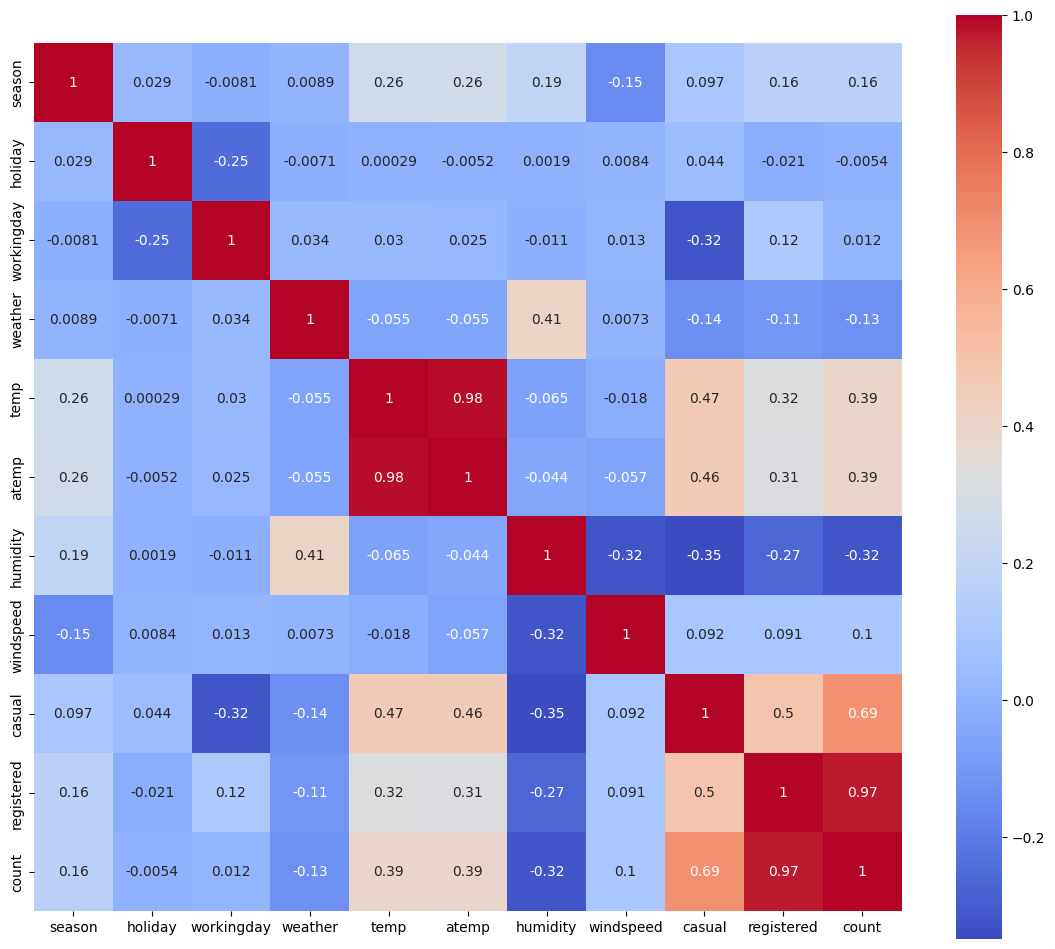

In [ ]:
data = data.drop(['datetime', 'wind_bins', 'temp_bins', 'humidity_bins'], axis = 1)
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(method="pearson"),square=True,annot=True,cmap="coolwarm")

**Inferences**:
1. **Dataset Duration**: The dataset spans from January 1, 2011, to December 19, 2012, capturing hourly rentals of electric cycles over this period.

2. **Missing Data**: Given data set has no null values and missing values.

3. **Outliers in Windspeed**: There are outliers observed on the upper quartile of the windspeed feature. No outliers are present in the features of temp, atemp and humidity.

4. **Mean and Median**: Mean and median of numerical columns like temp, atemp, windspeed and humidity are almost same. Hence, we can conclude that outlier doesn’t have much effect on the data.

**Univariate Analysis:**

**5. **Seasonal Rental Trends**: Number of rentals are highest during fall followed by summer, winter and spring. Summer, winter and fall has almost same number of rentals.

6. **Impact of Weather on Rentals**: Clean weather has more rents followed by mist and light snow. During heavy rainfall number of rentals are negligible.

7. **Holiday Rentals**: The number of electric cycles rented is significantly lower on holidays compared to non-holidays.

8. **Weekday vs. Weekend Rentals**: On working days, the number of electric cycles rented is almost double that of non-working days.

9. **Rentals based on temperature conditions**: Number of rentals are very high in the temperature range of 10-30 degree Celsius.

10. **Rentals based on wind speed**: Number of rentals are very high during 0 -20 units wind speed.

11. **Rentals based on humid conditions**: Number of rentals are very high during 30-80 units humid conditions.

12. **Weekday vs. Weekend Averages**: While the number of cycles rented on weekends is approximately half that of weekdays, the average number of cycles rented remains similar for both.

13. **Outliers in Workingday**: There are numerous outliers observed in the number of cycles rented on working days.

**Bivariate analysis:**
14. **Weather and Seasonal Rentals**: Whatever may be the season, clear weather has more rentals followed by mist and light snow. Combination of fall season and clean weather has the highest number of rentals.
15. **Rentals based on temperature and wind conditions**: Rentals are very high during normal temperature (10-30) and normal windspeed (0-20).
16. **Correlation between temp and atemp**: temp and atemp are strongly positively correlated with a correlation coefficient of 0.984948.

**Recommendations**

1. **Working Day Impact**: There is no significant difference in the number of cycles rented between working days and non-working days, with a significance level of 0.05. Therefore, the demand for cycles remains consistent regardless of whether it is a working day or non-working day, and the same number of cycles should be made available on both types of days.

2. **Holiday Impact**: There is no significant difference in the number of cycles rented between holidays and non-holidays, with a significance level of 0.05. Hence, the demand for cycles remains consistent irrespective of whether it is a holiday or a regular day, suggesting that the same number of cycles should be made available on both types of days.

3. **Weather Impact**: Weather conditions have a significant impact on the number of cycles rented. During clear weather, a higher number of cycles should be stocked, while a moderate number of cycles should be stocked during misty weather. However, during heavy rains, only a few cycles are needed, as the demand significantly decreases during this weather condition.

4. **Season Impact**: The season has a notable effect on the number of cycles rented. More cycles should be stocked during the seasons of summer, fall, and winter. Conversely, during spring, fewer cycles are needed, as the demand decreases during this season compared to others.



